<a href="https://colab.research.google.com/github/njy-mbc/Python25Study/blob/main/01_01_mbc%EB%A7%88%EC%BC%93%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 알고리즘은 지도학습과 비지도학습으로 나누어진다.

1. 지도학습 : 훈련하기 위한 데이터와 정답이 필요
2. 비지도학습 : 정답이 없는 학습 자료가 필요하다.

지도학습에서 데이터와 정답을 코드로 입력해서 전처리를 해야하는데  
이 때 데이터를 input이라는 변수에 넣고 정답을 target이라는 변수에 넣어 진행하겠다.

이 input과 target을 합쳐서 훈련데이터(training data)라고 한다.

입력으로 사용된 길이와 무게 => 특성(feature)라고 한다.

대부분 수치자료를 이용해서 판단하고 학습하며 분석할 수 있는 기법을 알아보자.

In [1]:
# mbc마켓에서는 살아있는 생선을 최초로 판매하려고 한다.
# 고객이 온라인 주문을 하면 가장 빠른 온라인 물류센터에서 신선한 생선을 곧바로 배송
# 여기서 문제가 발생! => 생선 포장 직원이 생선의 종류를 알지 못함!
# IP카메라를 이용해서 수족관을 실시간 촬영하고 이것을 객체 추적 기술을 활용?

# 현재는 AI기술을 배우는 단계라 사이즈를 이용해서 AI에게 학습을 시켜보겠다.
# 일단, 도미와 빙어부터 시작한다.(2개의 객체를 찾도록 훈련 => 머신러닝)
# 전처리 데이터가 필요!

In [4]:
# 도미 생선의 길이 : bream_length 도미용 길이 리스트
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미 생선의 무게 : bream_weigh 도미용 무게 리스트
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

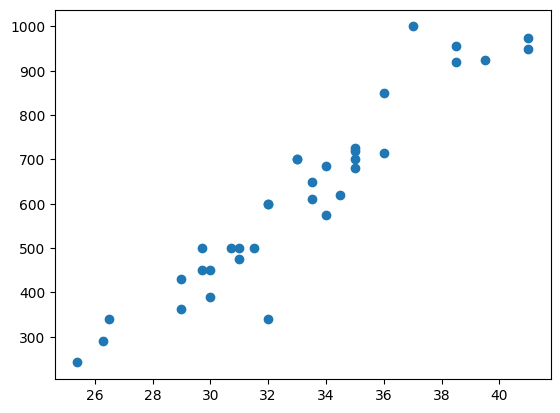

In [5]:
# 특성 : 데이터의 특징(수치자료, 이미지자료, 배열자료 등...)
# 첫번째 도미의 특성 : 길이(25.4), 무게(242.0)
# 두번째 도미의 특성 : 길이(26.3), 무게(290.0)

# 두 특성을 숫자로 보는 것보다 그래프로 표현하면 데이터를 잘 이해할 수 있다
# 길이 : x축 / 무게 : y축 => 산점도(두 좌표의 관계)

# 파이썬 외부라이브러리
import matplotlib.pyplot as plt
# 과한 계산용으로 그래프를 그리는 대표적인 패키지
# https:wikidocs.net/92071

plt.scatter(bream_length, bream_weight)
# 가로길이 배열과 무게 배열을 차트로 만듬

plt.xlabe = ('length') # x축 라벨
plt.ylabe = ('weight') # y축 라벨
plt.show()

In [ ]:
# 보고서를 작성한다!
# 도미 35마리를 2차원 그래프에 점으로 나타내 보았다.
# 결론 : 생선의 길이가 길수록 무게가 많이 나간다 => 선형적이라고 함!

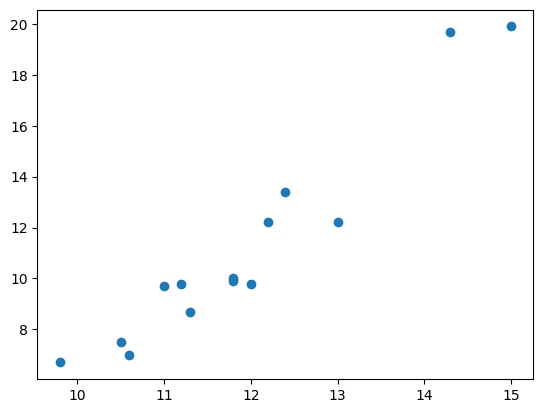

In [7]:
# 빙어 데이터를 14개 준비

# 빙어 생선의 길이 : bream_length 도미용 길이 리스트
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 생선의 무게 : bream_weigh 도미용 무게 리스트
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

plt.scatter(smelt_length, smelt_weight)
plt.xlabel = ('length')
plt.ylabel = ('weight')
plt.show()

In [10]:
# 지금까지 리스트에 나누어져 있던 배열을 ai학습용으로 재배치 한다.
length = bream_length + smelt_length # 도미 길이 + 빙어 길이
weight = bream_weight + smelt_weight # 도미 무게 + 빙어 무게

# print(length)
# print(weight)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [12]:
# zip() 나열된 리스트 각각에서 하나씩 원소를 꺼내어 반환
fish_date = [[l,w] for l,w in zip(length, weight)]
# length, weight를 2차원 리스트로 만듬
print(fish_date)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [13]:
# 머신러닝은 정답을 target이라는 값으로 알려줘야 한다
# target 0(빙어), 1(도미)를 처리하려함

# 생선 49마리에 대한 정답 리스트를 만들어야함
# 머신러닝에서는 정답 데이터를 2진분류로 테스트 해보려함

fish_target = [1] * 35 + [0] * 14
print(fish_target)

# 여기까지가 전처리

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [14]:
# 지금까지 전처리 데이터를 만들었다면 ai에 기본적으로 기초가 되는 사이킷런을 활용하여 트레이닝을 시켜보자

from sklearn.neighbors import KNeighborsClassifier # K-최근접 이웃 분류 알고리즘

kn = KNeighborsClassifier()

In [15]:
# 객체를 호출하였으면 전처리 데이터를 삽입한다.

# fish_date, fish_target을 전달하여 도미를 찾기 위한 기준을 학습(.fit)시킨다
# (트레이닝 데이터 : 훈련 정답 데이터)

kn.fit(fish_date, fish_target)

KNeighborsClassifier()

In [16]:
# 얼마나 잘 훈련되었는지 평가를 해보자. score()
kn.score(fish_date, fish_target) # 1.0 => 100% 정확도
# 훈련시 전처리데이터가 얼마 되지 않아 100%(과대적합) => 85 ~ 90% 정상

1.0

In [18]:
# K-최근접 이웃 알고리즘 파악해보기

kn.predict([[30,600]]) # predict[길이, 무게] 새로운 데이터의 정답을 예측(2진 분류)
# 결론 1 => 도미

array([1])

In [19]:
kn.predict([[8,10]])
# 결론 0 => 빙어

array([0])

In [20]:
# k-최근접 이웃 알고리즘을 위해 준비해햐 할일은 데이터를 전부 가지고 있는게 전부
# 새로운 데이터에 대해 예측할 때는 가장 가까운 직선거리에 어떤 데이터가 있는지 살피기
# 단점, 데이터가 아주 많은 경우 사용하기 좀 어렵다
# 데이터가 크기 떄문에 메모리가 많이 필요, 직선거리 계산 시간도 오래 걸림
# 객체를 메모리에 만들고 활용한다
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [21]:
print(kn._fit_method)

kd_tree


In [22]:
# 정답 파일 1 : 도미, 0 : 빙어
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [23]:
# K-최근접 이웃 알고리즘은 훈련 결과 파일이 존재하지 않는다
# 새로운 데이터가 들어오면 가장 가까운 데이터를 메모리에서 참고하여 도미(1), 방어(0)을 구분한다
kn.predict([[5,15]])

array([0])

In [25]:
# 객체 생성시 n_neighbors=??? 참고할 이웃 데이터 수 기본 값은 5
# 이웃 객체를 5개 찾아서 결론을 내린다

# 5가 아닌 값으로 바꾸려면?
kn49 = KNeighborsClassifier(n_neighbors=49)
# 원본, 타겟 데이터가 49인데
# 가장 가까운 데이터 49개를 사용함

kn49.fit(fish_date, fish_target)
kn49.score(fish_date, fish_target)

0.7142857142857143

In [26]:
# n_neighbors= 값을 변경해 가면서 최적의 정답을 찾는것이 머신러닝 훈련 개발자의 목표
# 가능하면 홀수로

kn49.predict([[5,15]]) # 길이 5cm, 무게 15g인 데이터를 찾아보자

array([1])